# Assignment 02 – Random Forest and Stacking

#### Project Group 7 - Tianqi Zhou - tz232

# Initialization



In [17]:
# import libraries required
import random
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# set a random seed for the project using the last four digits of uid
random.seed(1024)

## Load the dataset.

In [18]:
# read the dataset
g07 = pd.read_csv('./sample_data/data.csv',header=0)


## Show first 6 data points using head().

In [19]:
# show the first records using .head()
g07.head(6)

,Unnamed: 0,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,0,28,44.6,152.0,19.304017,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,1,0,36,65.0,161.5,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,2,1,33,68.8,165.0,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,3,0,37,65.0,148.0,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,4,0,25,52.0,161.0,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,5,0,36,74.1,165.0,27.217631,15,78,28,11.20,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0


## Describe pandas Dataframe by using describe.

In [20]:
# use .describe() to get the stastics of the dataset
g07.describe()

,Unnamed: 0,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,270.000000,0.327172,31.430684,59.637153,156.484835,24.319360,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,0.469615,5.411006,11.028287,6.033545,4.050810,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.000000,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,270.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,405.000000,1.000000,35.000000,65.000000,160.000000,26.638918,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,540.000000,1.000000,48.000000,108.000000,180.000000,38.900714,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment).

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'PCOS (Y/N)'),
 Text(2.5, 0, ' Age (yrs)'),
 Text(3.5, 0, 'Weight (Kg)'),
 Text(4.5, 0, 'Height(Cm) '),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'Blood Group'),
 Text(7.5, 0, 'Pulse rate(bpm) '),
 Text(8.5, 0, 'RR (breaths/min)'),
 Text(9.5, 0, 'Hb(g/dl)'),
 Text(10.5, 0, 'Cycle(R/I)'),
 Text(11.5, 0, 'Cycle length(days)'),
 Text(12.5, 0, 'Marraige Status (Yrs)'),
 Text(13.5, 0, 'Pregnant(Y/N)'),
 Text(14.5, 0, 'No. of aborptions'),
 Text(15.5, 0, '  I   beta-HCG(mIU/mL)'),
 Text(16.5, 0, 'II    beta-HCG(mIU/mL)'),
 Text(17.5, 0, 'FSH(mIU/mL)'),
 Text(18.5, 0, 'LH(mIU/mL)'),
 Text(19.5, 0, 'FSH/LH'),
 Text(20.5, 0, 'Hip(inch)'),
 Text(21.5, 0, 'Waist(inch)'),
 Text(22.5, 0, 'Waist:Hip Ratio'),
 Text(23.5, 0, 'TSH (mIU/L)'),
 Text(24.5, 0, 'AMH(ng/mL)'),
 Text(25.5, 0, 'PRL(ng/mL)'),
 Text(26.5, 0, 'Vit D3 (ng/mL)'),
 Text(27.5, 0, 'PRG(ng/mL)'),
 Text(28.5, 0, 'RBS(mg/dl)'),
 Text(29.5, 0, 'Weight gain(Y/N)'),
 Text(30.5, 0, 'hair growth(Y/N)'),
 T

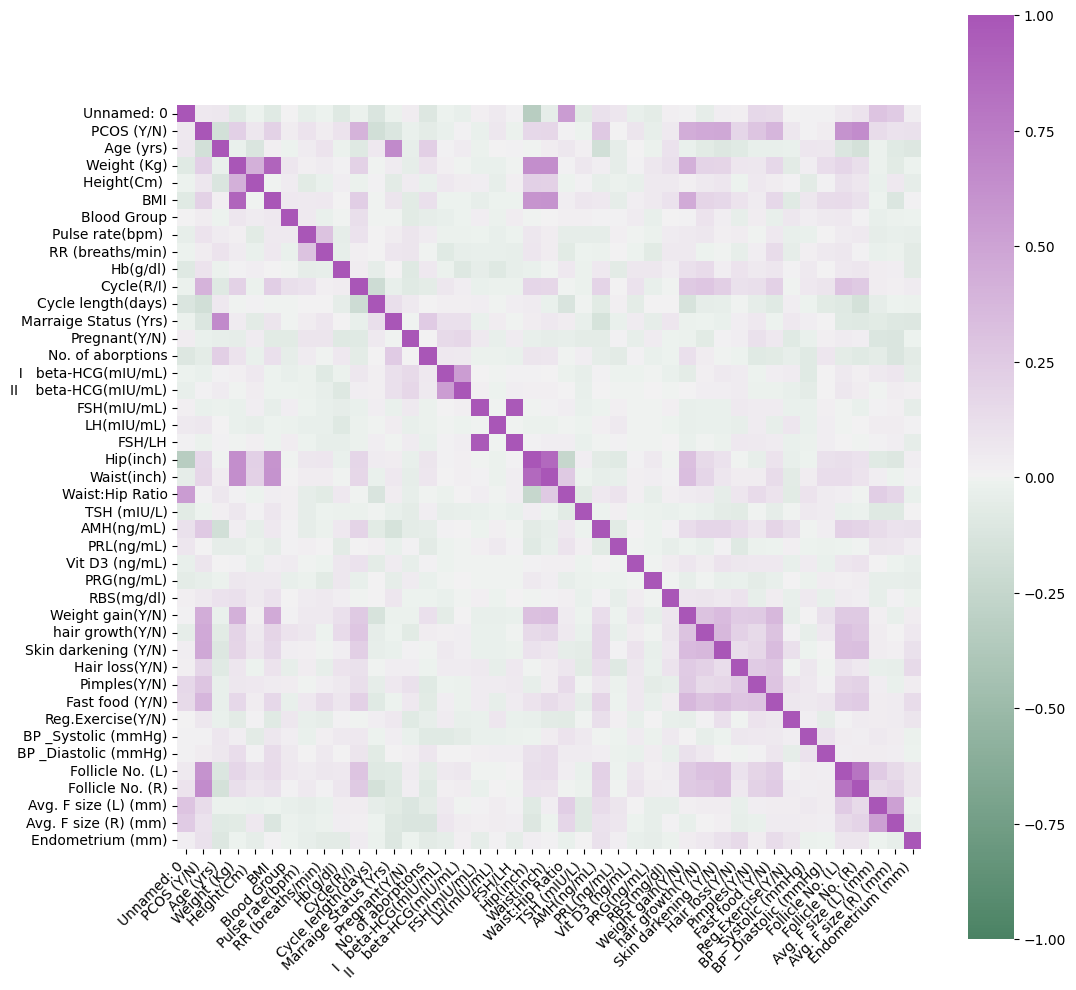

In [21]:
from matplotlib import rcParams
import seaborn as sns

# change the default setting of the figure using rcParams
rcParams["figure.figsize"] = 12, 12
rcParams["figure.dpi"] = 100

# calculate the correlation of the variables
corr = g07.corr()

# create the heatmap
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True,
)
# add tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")


## Show the Scatterplot matrix for the dataframe (avoid matplotlib and sns for this assignment). You can use Scatterplot Matrix Plotly. Use the code for the second image that shows different colors for classes. In this case, you will get two colors since we have two classes. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). No need to explain the plots but do save them in a pdf/svg/png with either static export function or html export function from plotly Interactive HTML Export Plotly.

In [22]:
import plotly.express as px
import pandas as pd

# define the color labels
colors = {0: '0', 1: '1'}
# Create a scatterplot matrix
fig = px.scatter_matrix(g07,
                        dimensions=g07.columns[:-1],  # Exclude the 'Class' column
                        color_discrete_sequence=["#93C572", "purple"],  # Set the color scale
                        title="Scatterplot Matrix with Color Palette",
                        labels={col: col for col in g07.columns[:-1]})

# update the layout to hide diagonal plots and make the marker smaller
fig.update_traces(diagonal_visible=False,marker=dict(size=3))

# change the figure size to make it clearer
fig.update_layout(
    width=2000,
    height=2000,
)
# save the figure as an interactive html
fig.write_html("scatter_matrix.html")

## Split the dataset into the Training set and Test set. Choose your preferred split and justify the rationale.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X = g07.drop(columns=['PCOS (Y/N)'])[0:542]
y = g07['PCOS (Y/N)'][0:542]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an imputer
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on your training data
X_train = imputer.fit_transform(X_train)
# You should do the same for X_test
X_test = imputer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(574, 42)

In [40]:
y_train_resampled

0      1
1      1
2      0
3      1
4      0
      ..
569    1
570    1
571    1
572    1
573    1
Name: PCOS (Y/N), Length: 574, dtype: int64

In [41]:
X_train

array([[244. ,  39. , 104. , ...,  16. ,  13. ,   9.6],
       [540. ,  23. ,  82. , ...,  19. ,  18. ,   6.9],
       [417. ,  32. ,  71.8, ...,  14. ,  13. ,   9. ],
       ...,
       [270. ,  30. ,  55.1, ...,  19. ,  18. ,   8. ],
       [435. ,  30. ,  64. , ...,  11. ,  16. ,   9. ],
       [102. ,  38. ,  64.3, ...,  17. ,   9. ,  11.3]])

In [42]:
y_train

244    1
540    1
417    0
509    1
353    0
      ..
71     0
106    0
270    0
435    0
102    1
Name: PCOS (Y/N), Length: 432, dtype: int64

In [43]:
X_test

array([[229. ,  28. ,  74.3, ...,  14. ,  13. ,   8.5],
       [ 73. ,  26. ,  70. , ...,  10.5,   6. ,   9.8],
       [352. ,  27. ,  60. , ...,  15. ,  18. ,   8. ],
       ...,
       [ 93. ,  32. ,  52. , ...,  14. ,  15. ,   9. ],
       [407. ,  36. ,  59. , ...,  17. ,  18. ,  11. ],
       [182. ,  42. ,  50. , ...,  11. ,  12. ,   5.5]])

In [44]:
y_test

229    0
73     0
352    1
86     0
470    1
      ..
148    1
46     1
93     0
407    0
182    0
Name: PCOS (Y/N), Length: 109, dtype: int64

Answer: Here I used a 60-40 training-test split because in this way, we could get sufficient training data for the model to learn the pattern, and we also have adequate testing data to evaluate the model performance.

## Perform classification routine by using LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), GaussianNB(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGboostclassifier. Output the accuracy box plot as we have seen in the class (make sure to change regressmod df to classmod. And use an appropriate metric for classification evaluation, for example, accuracy, precision,recall etc). Remember to use the object oriented approach and develop a function (def...), this will be very helpful for the next assignment.

In [31]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression()
  models["KNN"] = KNeighborsClassifier(n_neighbors=3)
  models["Tree"] = DecisionTreeClassifier()
  models["svc"] = SVC()
  models["NB"] = GaussianNB()
  models["Random Forest"] = RandomForestClassifier()
  models["Bagging"] = BaggingClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  return models


# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='accuracy', cv=cv, n_jobs=-1,
                            error_score='raise')
  return scores

In [33]:
import numpy as np
models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list()

for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

# specify our classifier dataframe and the name of the classifiers
classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])

# plot the result in box plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")

# save the figure as an interactive html
from google.colab import drive

drive.mount('/content/drive')


>lg 0.853 (0.031)
>KNN 0.706 (0.038)
>Tree 0.867 (0.029)
>svc 0.483 (0.031)
>NB 0.825 (0.072)
>Random Forest 0.941 (0.028)
>Bagging 0.910 (0.018)
>GBM 0.935 (0.026)
>XGB 0.926 (0.018)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Select the best classifier for level o classifier. Use logistic regression as a second level classifier. Similar to 5 generate the box plot and show the accuracy of each algorithm as well as stacked classifier. Also show the metrices of the above algorithms .

In [34]:
# the best model is XGBoosting classifier
from sklearn.ensemble import StackingClassifier
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('XGB', XGBClassifier()))

	# define second level model
  level1 = LogisticRegression()

	# define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression()
  models["XGB"] = XGBClassifier()
  models["Stacked Model"] = get_stacking()
  return models


# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='accuracy', cv=cv, n_jobs=-1,
                            error_score='raise')
  return scores

models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list()

for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))


classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg", "XGB","stacked model"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg", "XGB","stacked model"])


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")

# save the figure as an interactive html
from google.colab import drive

drive.mount('/content/drive')



>lg 0.853 (0.031)
>XGB 0.926 (0.018)
>Stacked Model 0.926 (0.021)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Export the Pickle model and import it back. Use the imported model to predict the y_test from x_test and report the confusion matrix

In [36]:
import pickle
# reshape the y array to avoid warning
#y_train = y_train.reshape(len(y_train),)
#y_test = y_test.reshape(len(y_test),)

level0 = list()
level0.append(('XGB', XGBClassifier()))

# define second level model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)

# save to file in the current working directory
pkl_filename_g07 = "AssignmentPickle.pkl"
with open(pkl_filename_g07, 'wb') as file:
    pickle.dump(model, file)

# load from file
with open(pkl_filename_g07, 'rb') as file:
    pickle_model = pickle.load(file)

# calculate the score and the prediction
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_pred = pickle_model.predict(X_test)

# report the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Test score: 88.99 %
[[74  3]
 [ 9 23]]


Show both text and visual confusion Matrices using scikit learn and matplotlib and
explain what the graph tells you and what you did

[[74  3]
 [ 9 23]]


<Figure size 187.5x187.5 with 0 Axes>

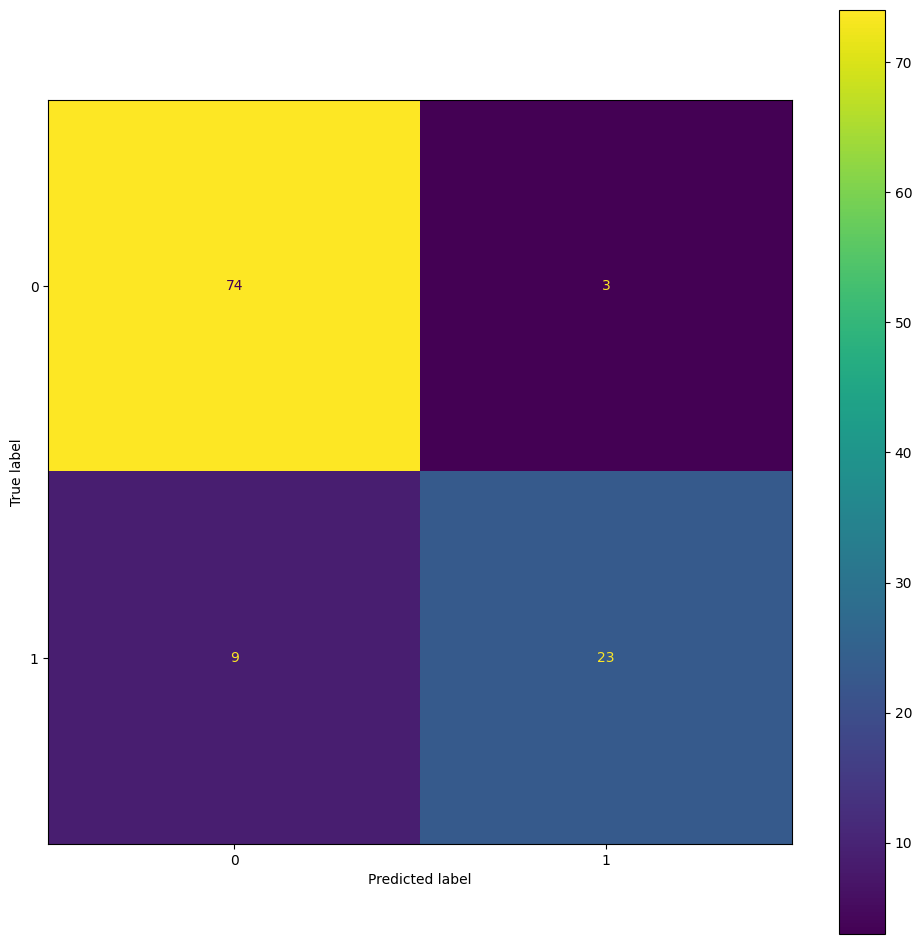

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# set the canvas for the confusion matrix with size = 2.5x2.5 and dpi = 75
plt.figure(figsize=(2.5, 2.5), dpi=75)

# use confusion_matrix from sklearn.metrics to calculate the confusion matrix for the test set
print(cm)

# use ConfusionMatrixDisplay to visualize the confusion matrix with the model, the input matrix, and the true value
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


Answer: The command first sets the canvas for the confusion matrix with size = 2.5x2.5 and dpi = 75. Then it uses confusion_matrix from sklearn.metrics to calculate the confusion matrix for the test set. ConfusionMatrixDisplay command is also used to visualize the confusion matrix with the model, the input matrix, and the true value.

The graph shows that almost all samples (113715 out of 113724) from type 0 are correctly classified. However, almost 1/4 (46 out of 199) of the samples from type 1 are classified wrongly. This might be due to the imbalence nature of our data set with type 0 many times as much as type 1. Therefore, the classifier tends to classify a sample to type 0 instead of type 1.